In [1]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [3]:
BATCH_SIZE = 5
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 15s 426ms/step - loss: 0.7081 - accuracy: 0.4688 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 0.6895 - accuracy: 0.5875 - val_loss: 0.6866 - val_accuracy: 0.5167
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6988 - accuracy: 0.4812 - val_loss: 0.6869 - val_accuracy: 0.5417
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.6838 - accuracy: 0.5562 - val_loss: 0.6818 - val_accuracy: 0.8083
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.6837 - accuracy: 0.5625 - val_loss: 0.6830 - val_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6781 - accuracy: 0.6125 - val_loss: 0.6538 - val_accuracy: 0.8417
Epoch 7/100
32/32 [==============================] - 1s 40ms/step - loss: 0.6532 - accuracy: 0.6438 - val_loss: 0.6130 - val_accuracy: 0.7250
Epoc

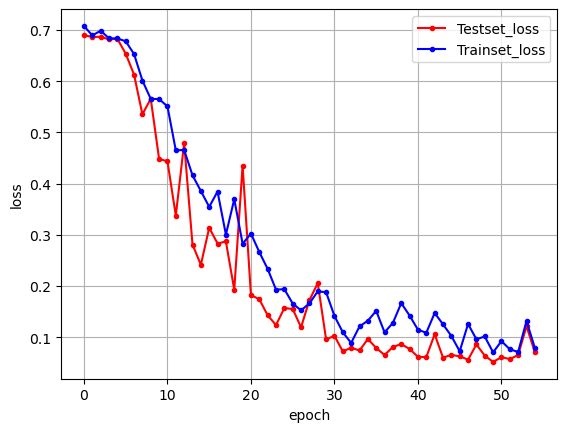

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()